<a href="https://colab.research.google.com/github/grandff/kdn-machinelearning/blob/main/KDN_WorkShop_%EC%9B%A8%EC%9D%B4%ED%8D%BC_%EB%B6%88%EB%9F%89_%EC%9C%A0%ED%98%95_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wafer Map Defect Classification

## 프로젝트 개요
반도체 공정에서 생성되는 웨이퍼 맵 데이터는 엔지니어가 불량의 원인을 식별하는 데 중요한 세부 정보를 제공합니다. 이러한 불량 패턴을 자동으로 식별하여 반도체 공정에서 웨이퍼 생산 공정을 개선할 수 있습니다.

본 프로젝트에서는 1만6천장의 이미지 데이터를 기반으로 웨이퍼 맵의 불량을 자동으로 분류하는 검사기를 만들고자 합니다.

아래의 이미지는 학습 데이터에서 시각화 한 예시로 이미지의 제목은 불량 유형을 의미합니다.

이미지에서 노란색 Pixel은 정상 다이(Die, 1) 검은색 Pixel은 비정상 다이(Die, 2)를 의미합니다.

![img](https://i.imgur.com/3nBXUU7_d.webp?maxwidth=760&fidelity=grand)


## 데이터 설명
#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 테스트를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - 예측한 불량 유형을 submission 파일에 작성한 후 제출합니다.

#### 데이터 구조 설명
- lotName : Lot 이름
- waferId : 해당 Lot에서의 Wafer 순서
- dieSize : 다이(Die)의 개수
- pixel_1 ~ pixcel 676 : 다이(Die)에 대한 정보
  - 0 : 26 x 26 이미지 형태를 유지를 위한 정보
  - 1 : 정상 Die 
  - 2 : 비정상 Die
- label : 불량 유형
    - 0: 'Center'
    - 1: 'Donut'
    - 2: 'Edge-Loc'
    - 3: 'Edge-Ring'
    - 4: 'Loc'
    - 5: 'Near-full'
    - 6: 'Random'
    - 7: 'Scratch'
    - 8: 'none'


## 프로젝트 구성
* 데이터 로드 (load data, train.csv, test.csv)
* 데이터 전처리 및 특성 공학 (train.csv, test.csv)
* 모델 생성 및 검증 (train.csv)
* 평가 데이터 예측 (test.csv)
* 결과 제출 및 점수 확인

## 제출 이력 및 순위 조회
[평가시스템](http://manage.jaen.kr)에 접속하여 확인 가능
> 로그인 -> 프로젝트 -> 웨이퍼 맵 불량 유형 분류 -> 리더보드

### 접속 정보
- ID : `~~~@sk.com`
- PWD : `mysuni`

## 환경 설정

In [ ]:
!pip install JAEN

In [ ]:
# 실전프로젝트 환경 설정
from JAEN.project import Project
pjt = Project('웨이퍼 맵 불량 유형 분류', # 프로젝트 이름
              '한전KDN',                       # 과정명
              '1차수 A반',                     # 차수 정보
              '198080@kdn.com')                  # 이메일 (숫자@kdn.com) * 본인의 이메일로 수정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 데이터 다운로드 및 압축 해제
!wget 'http://49.247.133.7/KDN_PJT_3.zip'
!mkdir data
!unzip KDN_PJT_3.zip -d data/

--2021-10-06 00:36:05--  http://49.247.133.7/KDN_PJT_3.zip
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4616293 (4.4M) [application/zip]
Saving to: ‘KDN_PJT_3.zip’

KDN_PJT_3.zip       100%[===================>]   4.40M  3.37MB/s    in 1.3s    

2021-10-06 00:36:06 (3.37 MB/s) - ‘KDN_PJT_3.zip’ saved [4616293/4616293]

Archive:  KDN_PJT_3.zip
  inflating: data/class.csv          
  inflating: data/event.csv          
  inflating: data/logs.csv           
  inflating: data/user_info.csv      
   creating: data/웨이퍼 맵 불량 유형 분류/
  inflating: data/웨이퍼 맵 불량 유형 분류/submission.csv  
  inflating: data/웨이퍼 맵 불량 유형 분류/test.csv  
  inflating: data/웨이퍼 맵 불량 유형 분류/train.csv  


## 모듈 import 
필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data 경로 설정
DATA_DIR = 'data'

# train 데이터셋 로드 (train.csv)
train = pd.read_csv('./data/웨이퍼 맵 불량 유형 분류/train.csv')
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv('./data/웨이퍼 맵 불량 유형 분류/test.csv')

# submission 파일 로드 (submission.csv)
submission = pd.read_csv('./data/웨이퍼 맵 불량 유형 분류/submission.csv')

2개의 데이터 셋트를 나누어 제공합니다.
1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [ ]:
# 코드를 입력해 주세요
# 학습 데이터 조회
train

,lotName,waferId,dieSize,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676,label
0,lot7,1,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,...,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,8
1,lot7,2,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,...,1,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,8
2,lot7,3,533.0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,8
3,lot7,4,533.0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,8
4,lot7,5,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,lot42179,21,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,8
14362,lot42179,22,533.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,8
14363,lot42179,23,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,...,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,8
14364,lot42179,24,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,8


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>waferId</th>
      <th>dieSize</th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>...</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>1</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>2</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>3</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>4</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>5</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 680 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요
# 테스트 데이터 조회
test

,lotName,waferId,dieSize,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,lot7,9,533.0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0
1,lot7,10,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0
2,lot7,12,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,lot7,14,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,2,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,lot7,16,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,lot42180,20,533.0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
15708,lot42180,21,533.0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,0,0,0,0,0,0,0,0,0,0
15709,lot42180,22,533.0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,2,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,2,0,0,0,0,0,0,0,0,0,0
15710,lot42180,23,533.0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>waferId</th>
      <th>dieSize</th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>9</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>10</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>12</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>14</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>16</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 679 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요
# 정답 제출용 데이터 조회
submission

,lotName,label
0,lot7,0
1,lot7,0
2,lot7,0
3,lot7,0
4,lot7,0
...,...,...
15707,lot42180,0
15708,lot42180,0
15709,lot42180,0
15710,lot42180,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# 코드를 입력해 주세요
# train 데이터 프레임의 lotName별 데이터의 개수를 확인하세요.
train['lotName'].value_counts()

lot40464    25
lot40488    25
lot252      25
lot42133    25
lot40332    25
            ..
lot10973     1
lot12088     1
lot12142     1
lot10638     1
lot12089     1
Name: lotName, Length: 743, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>lot40341    25
lot42163    25
lot42177    25
lot40461    25
lot42127    25
            ..
lot10638     1
lot10992     1
lot10971     1
lot10587     1
lot7654      1
Name: lotName, Length: 743, dtype: int64</pre>

In [ ]:
# 코드를 입력해 주세요
# lotName의 개수 결과를 대상으로 한번 더 데이터의 개수를 확인하세요. 
train['lotName'].value_counts().value_counts()

25    150
24     95
23     83
22     71
21     65
1      59
20     50
19     28
18     23
17     19
14     18
15     14
13     14
16     12
12     10
11     10
3       6
6       5
2       4
10      3
4       2
7       1
5       1
Name: lotName, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>25    150
24     95
23     83
22     71
21     65
1      59
20     50
19     28
18     23
17     19
14     18
15     14
13     14
16     12
12     10
11     10
3       6
6       5
2       4
10      3
4       2
7       1
5       1
Name: lotName, dtype: int64</pre>

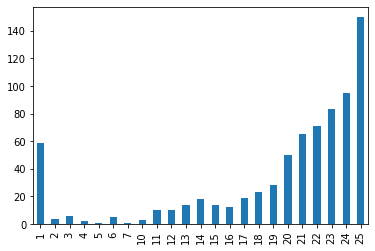

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
train['lotName'].value_counts().value_counts().sort_index().plot(kind='bar')

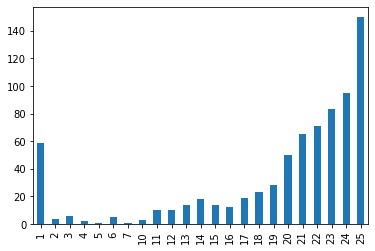

In [ ]:
# 코드를 입력해 주세요
# test 데이터 프레임의 lotName별 데이터의 개수를 확인하세요.
test['lotName'].value_counts()

lot10616    25
lot12134    25
lot7620     25
lot10578    25
lot10618    25
            ..
lot10980     1
lot1745      1
lot1608      1
lot1632      1
lot42176     1
Name: lotName, Length: 1151, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>lot7578     25
lot12065    25
lot12018    25
lot10619    25
lot12143    25
            ..
lot249       1
lot221       1
lot275       1
lot157       1
lot149       1
Name: lotName, Length: 1151, dtype: int64</pre>

In [ ]:
# 코드를 입력해 주세요
# lotName의 개수 결과를 대상으로 한번 더 데이터의 개수를 확인하세요. 
test['lotName'].value_counts().value_counts()

25    349
1     127
2     100
24     93
3      71
4      71
5      53
6      34
12     33
13     27
7      26
23     25
8      24
11     20
10     16
22     15
9      13
14     11
20     11
15      8
18      8
19      7
17      4
21      4
16      1
Name: lotName, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>25    349
1     127
2     100
24     93
3      71
4      71
5      53
6      34
12     33
13     27
7      26
23     25
8      24
11     20
10     16
22     15
9      13
14     11
20     11
15      8
18      8
19      7
17      4
21      4
16      1
Name: lotName, dtype: int64</pre>

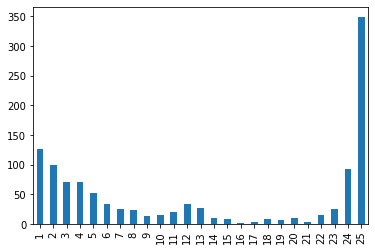

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
test['lotName'].value_counts().value_counts().sort_index().plot(kind='bar')

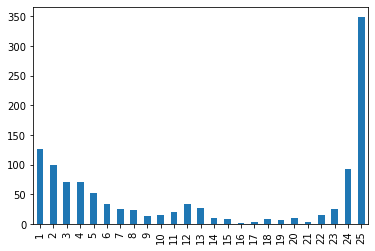

In [ ]:
# 코드를 입력해 주세요
# train 데이터 프레임의 waferId별 데이터의 개수를 확인하세요.
train['waferId'].value_counts()

2     589
3     589
10    582
18    582
4     581
8     579
1     579
16    578
14    577
25    577
23    575
22    575
19    575
15    574
13    574
17    574
24    572
11    570
5     570
6     570
12    569
7     569
9     564
20    562
21    560
Name: waferId, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>2     589
3     589
10    582
18    582
4     581
8     579
1     579
16    578
14    577
25    577
23    575
22    575
19    575
15    574
13    574
17    574
24    572
11    570
5     570
6     570
12    569
7     569
9     564
20    562
21    560
Name: waferId, dtype: int64</pre>

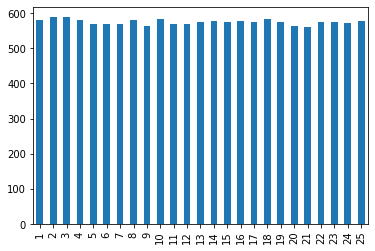

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
train['waferId'].value_counts().sort_index().plot(kind='bar')

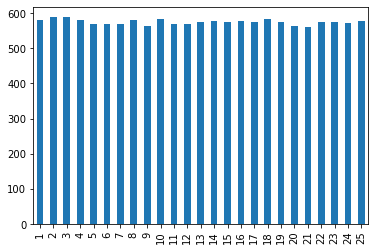

In [ ]:
# 코드를 입력해 주세요
# test 데이터 프레임의 waferId별 데이터의 개수를 확인하세요.
test['waferId'].value_counts()

1     730
2     682
5     678
6     673
4     671
7     668
9     665
3     665
12    658
11    658
8     655
10    647
13    635
15    614
14    611
17    607
16    607
20    606
21    600
19    595
18    595
22    580
23    571
24    553
25    488
Name: waferId, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>1     730
2     682
5     678
6     673
4     671
7     668
9     665
3     665
12    658
11    658
8     655
10    647
13    635
15    614
14    611
17    607
16    607
20    606
21    600
19    595
18    595
22    580
23    571
24    553
25    488
Name: waferId, dtype: int64</pre>

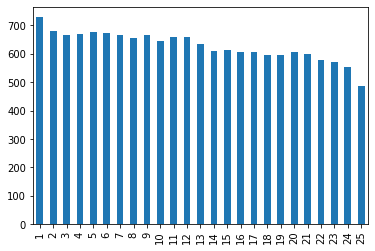

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
test['waferId'].value_counts().sort_index().plot(kind="bar")

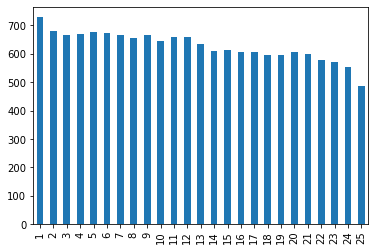

In [ ]:
# 코드를 입력해 주세요
# train 데이터의 label 컬럼의 개수를 계산하세요
## 8이 정상임
train['label'].value_counts()

8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: label, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: label, dtype: int64</pre>

In [ ]:
# 코드를 입력해주세요
# 아래의 정보를 참고하여 label_name 컬럼을 생성하세요.
# (0 -> Center), (1 -> Donut), (2 -> Edge-Loc), (3 -> Edge-Ring), (4 -> Loc), (5 -> Near-full),(6 -> Random), (7 -> Scratch), (8 -> none)
## 숫자 코드에 맞는 오류 유형 텍스트로 변환하는 함수 생성
## apply는 람다 함수를 적용할 수 있는 함수임
## 사용자 함수도 적용 가능함
def rename(x):
  data = {
      0: 'Center' , 1: 'Donut', 2: 'Edge-Loc', 3: 'Edge-Ring', 4: 'Loc', 5: 'Near-full', 6: 'Random', 7: 'Scratch', 8: 'none'
  }
  return data[x]

train['label_name'] = train['label'].apply(rename)
train['label_name']

0        none
1        none
2        none
3        none
4        none
         ... 
14361    none
14362    none
14363    none
14364    none
14365    none
Name: label_name, Length: 14366, dtype: object

In [ ]:
# 코드를 입력해 주세요
# train 데이터의 label_name 컬럼의 개수를 계산하세요
train['label_name'].value_counts()

none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: label_name, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: label_name, dtype: int64</pre>

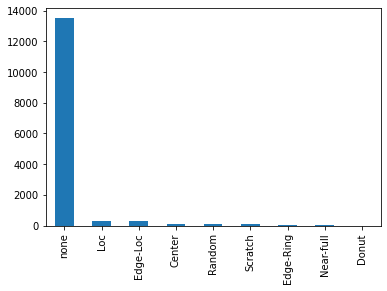

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. 
train['label_name'].value_counts().plot(kind="bar")

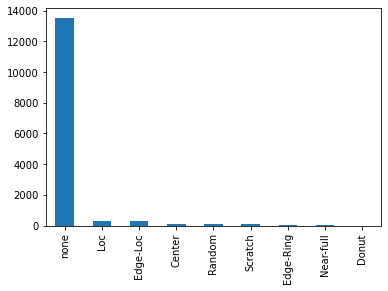

In [ ]:
# 코드를 입력해 주세요
# train 데이터 프레임에 컬럼명에 pixel 이라는 문자열이 있는 컬럼명만 선택하여 X에 저장하세요.
## train.columns.values.tolist()
cols = [col for col in train.columns if 'pixel' in col]
X = train[list(cols)]
X

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,1,2,1,...,1,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,1,1,...,1,1,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,1,...,1,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
14362,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0
14363,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,2,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0
14364,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>pixel_8</th>
      <th>pixel_9</th>
      <th>pixel_10</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>14361</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14362</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14363</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14364</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14365</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>14366 rows × 676 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요.
# X 데이터를 Numpy Array로 변경하여 (14366, 26, 26) 으로 shape을 변경하세요. (images변수에 저장하세요.)
images = X.to_numpy().reshape(14366, 26, 26)
images.shape

(14366, 26, 26)

<p><strong>[출력 결과]</strong></p><pre>(14366, 26, 26)</pre>

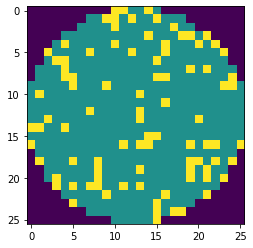

In [ ]:
# 코드를 입력해 주세요.
# images 변수의 첫번째 데이터를 선택하여 시각화 하세요 (plt.imshow 함수 이용)
plt.imshow(images[0])

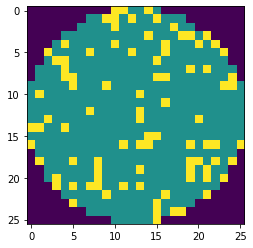

In [ ]:
# 각 레이블별 데이터 1개씩 추출
## ???? 이거 쓰벌 먼말임..
## train 데이터에서 각 레이블별 데이터 인덱스를 하나씩 추출한거 같음.. 내가봤을땐?
## 문법이 뭔지좀 알아야겠는디
info = [[label, train[train['label_name'] == label].index[0]] for label in train['label_name'].unique()]
info

[['none', 0],
 ['Edge-Ring', 27],
 ['Edge-Loc', 99],
 ['Scratch', 392],
 ['Random', 395],
 ['Center', 397],
 ['Loc', 432],
 ['Near-full', 668],
 ['Donut', 10686]]

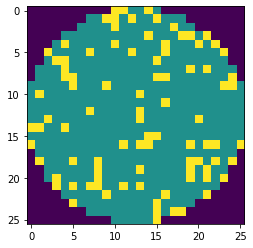

In [ ]:
plt.imshow(images[info[0][1]]) 

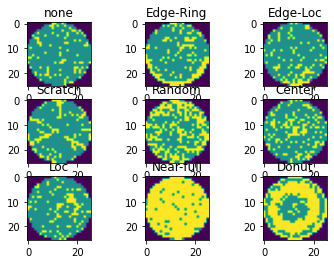

In [ ]:
# 코드를 입력해 주세요.
# 위의 info 변수를 이용하여 각 레이블별 웨이퍼맵을 시각화 하세요.
for i in range(1,10) :
  plt.subplot(3,3,i)
  plt.imshow(images[info[i-1][1]])
  plt.title(info[i-1][0])

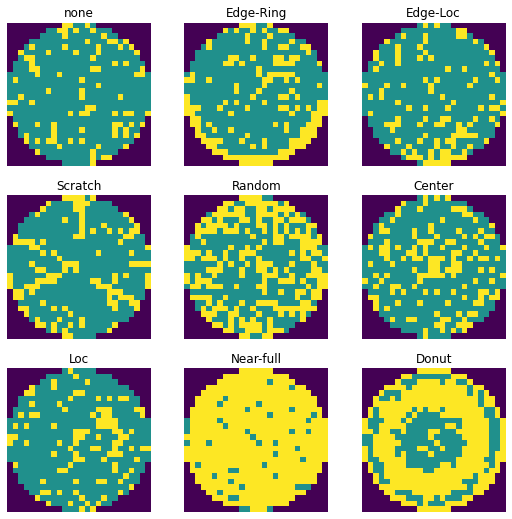

In [ ]:
# 코드를 입력해 주세요
# label 컬럼을 Y에 저장하세요.
Y = train['label']
Y

0        8
1        8
2        8
3        8
4        8
        ..
14361    8
14362    8
14363    8
14364    8
14365    8
Name: label, Length: 14366, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>0        8
1        8
2        8
3        8
4        8
        ..
14361    8
14362    8
14363    8
14364    8
14365    8
Name: label, Length: 14366, dtype: int64</pre>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report

In [ ]:
# 코드를 입력해 주세요
# 분리된 X와 Y를 Train과 Test로 분할하세요.
## startify = Y 를 없애주면 에러가 해결됨
## 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [ ]:
# 코드를 입력해 주세요
# KNN 알고리즘을 이용하여 모델링하고 성능을 출력하세요. (K는 9로 지정하세요.)
model = KNeighborsClassifier(n_jobs=-1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test,y_test)

(0.9507146834973084, 0.9457126948775055)

<p><strong>[출력 결과]</strong></p><pre>(0.946723593837015, 0.9457126948775055)</pre>

In [ ]:
# 코드를 입력해 주세요
# test 데이터 프레임에 컬럼명에 pixel 이라는 문자열이 있는 컬럼명만 선택하여 X2에 저장하세요.
cols2 = [col for col in test.columns if 'pixel' in col]
X2 = test[list(cols2)]
X2

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,1,1,1,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,2,...,2,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
15708,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,0,0,0,0,0,0,0,0,0,0
15709,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,2,1,1,...,2,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,2,0,0,0,0,0,0,0,0,0,0
15710,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,2,...,1,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>pixel_8</th>
      <th>pixel_9</th>
      <th>pixel_10</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>15707</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15708</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15709</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15710</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15711</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>15712 rows × 676 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요
# X2 데이터 프레임을 예측하여 submission 데이터 프레임의 label 컬럼에 추가하세요.
submission['label'] = model.predict(X2)

In [ ]:
submission

,lotName,label
0,lot7,8
1,lot7,8
2,lot7,8
3,lot7,8
4,lot7,8
...,...,...
15707,lot42180,8
15708,lot42180,8
15709,lot42180,8
15710,lot42180,8


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>15707</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15708</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15709</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15710</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15711</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
<p>15712 rows × 2 columns</p>
</div>

# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

In [ ]:
pjt.submit(submission) # 제출 파일 생성 및 결과 제출

파일을 저장하였습니다. 파일명: submission-02-10-27.csv
제출 여부 :success
오늘 제출 횟수 : 1
제출 결과:0.8926093681567394


# 축하드립니다. 모델의 성능을 개선하여 더 좋은 점수를 획득해보세요!

In [ ]:
# LogisticRegreesion 모델을 적용 
model = LogisticRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9688138110265454, 0.9465478841870824)

In [ ]:
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.78      0.25      0.38        28
           1       0.00      0.00      0.00         1
           2       0.61      0.31      0.41        54
           3       1.00      0.50      0.67        10
           4       0.38      0.06      0.10        84
           5       0.50      0.33      0.40         6
           6       0.89      0.50      0.64        16
           7       1.00      0.05      0.09        22
           8       0.95      1.00      0.97      3371

    accuracy                           0.95      3592
   macro avg       0.68      0.33      0.41      3592
weighted avg       0.93      0.95      0.93      3592



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# DecisionTree 모델을 적용 후 성능을 평가하세요. 
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9989790235752738, 0.9184298440979956)

In [ ]:
# RandomFores 모델을 적용 후 성능을 평가하세요. 
model = RandomForestClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9989790235752738, 0.9548997772828508)

In [ ]:
submission['label'] = model.predict(X2)
submission

,lotName,label
0,lot7,8
1,lot7,8
2,lot7,8
3,lot7,8
4,lot7,8
...,...,...
15707,lot42180,8
15708,lot42180,8
15709,lot42180,8
15710,lot42180,8


In [ ]:
pjt.submit(submission) # 제출 파일 생성 및 결과 제출

파일을 저장하였습니다. 파일명: submission-02-18-51.csv
제출 여부 :success
오늘 제출 횟수 : 2
제출 결과:0.9177352759927673


In [ ]:
# GradientBoosting 모델을 적용 후 성능을 평가하세요. 
model = GradientBoostingClassifier().fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)

(0.9839428253202154, 0.9576837416481069)

In [ ]:
submission['label'] = model.predict(X2)
pjt.submit(submission) # 제출 파일 생성 및 결과 제출

파일을 저장하였습니다. 파일명: submission-02-21-11.csv
제출 여부 :success
오늘 제출 횟수 : 3
제출 결과:0.9113406107482778


**실습 정리**
```
<웨이퍼 불량 유형 분류>
웨어퍼 맵의 불량을 자동으로 분류하는 검사기를 만들어야함

전제조건!!
- 데이터에 Lot 종류가 어떤게 있고, 몇개씩 가지고 있는지 확인
- 데이터에 Wafer(웨이퍼) 순서 확인 - waferId  // 대충 반도체에 중요한 재료임 원판모양
- 데이터에 label(불량 유형)이 어떤게 있는지 확인
0: 'Center' / 1: 'Donut' / 2: 'Edge-Loc' / 3: 'Edge-Ring' / 4: 'Loc' / 5: 'Near-full' / 6: 'Random' / 7: 'Scratch' / 8: 'none' 
- 데이터에 Die(다이)에 대한 정보 확인
0 : 26 x 26 이미지 형태 유지를 위한 정보, 1: 정상 Die, 2 : 비정상 Die

1) 데이터 전처리
- train, test 데이터를 lotName을 기준으로 몇개씩 가지고 있는지 파악
	-> value_counts를 두번 씀.. 해당 lot을 몇개씩 가지고 있는지 groupby 한걸 다시 갯수별로 정렬하려고 한건지 뭔지
- 위의 결과를 index 분류를 하고 plot으로 시각화
- train, test 데이터의 waferId(웨이퍼 순서) 확인
- 위의 결과를 index 분류를 하고 plot으로 시각화
- train 데이터의 label(불량 유형) 확인
- 숫자 데이터로 있는 label을 string 형으로 이름을 확인할 수 있도록 label_name 생성 후 train df에 추가
- train 데이터에 pixel에 해당하는 데이터만 추출 후 저장
	-> 아마 각 웨어퍼맵별 이미지를 보기 위해서 추출하는거 같음
- label_name 별 오류 유형 이미지 확인
	-> 파이썬 문법으로 뭔가 추출해냈음.. 뭐지
	-> 추출해낸걸 바탕으로 레이블 별 웨이퍼맵 시각화

- X에는 현재 반도체 pixel 이미지 데이터 ? 이건 불량인지 아닌지 모름??????
- Y에는 label 컬럼만 따로 저장
- 모델별로 점수 확인하기


```